Q.1. Write python code from scratch for Sobel Edge, and Laplacian edge detection methods for image (lena.tif) and demonstrate results of each step and also compare final result with OpenCV functions   compare results with OpenCV function.



In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import time

(512, 512)
Gx
 [[-1.  0.  1.]
 [-2.  0.  2.]
 [-1.  0.  1.]] 
Gy
 [[-1. -2. -1.]
 [ 0.  0.  0.]
 [ 1.  2.  1.]]


<ipython-input-4-a19f6867546f>:35: RuntimeWarning: invalid value encountered in sqrt
  result_cv2= np.sqrt(np.square(x) + np.square(y))


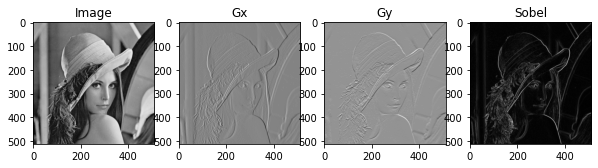

Time taken: 4.550154 s


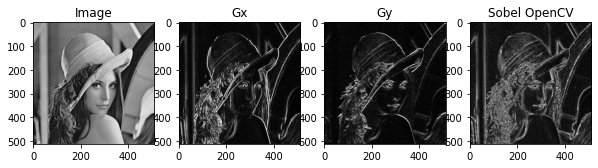

Time taken: 0.002234 s


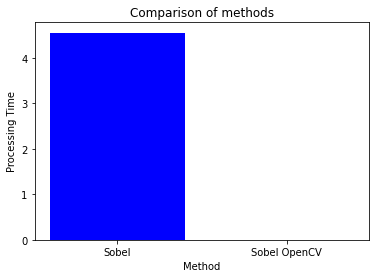

In [4]:
# Sobel

# Read image
img = cv2.imread('lena.tif',0)
s=img.shape
print(s)

Gx = np.array([[-1.0, 0.0, 1.0], [-2.0, 0.0, 2.0], [-1.0, 0.0, 1.0]])
Gy = np.array([[-1.0, -2.0, -1.0], [0.0, 0.0, 0.0], [1.0, 2.0, 1.0]])
print("Gx\n",Gx,"\nGy\n",Gy)
    
def sobel(img):
    Gx = np.array([[-1.0, 0.0, 1.0], [-2.0, 0.0, 2.0], [-1.0, 0.0, 1.0]])
    Gy = np.array([[-1.0, -2.0, -1.0], [0.0, 0.0, 0.0], [1.0, 2.0, 1.0]])
    
    result=np.zeros(s)
    gx=np.zeros(s)
    gy=np.zeros(s)
    for i in range(s[0] - 2):
        for j in range(s[1] - 2):
            gx[i + 1, j + 1]= np.sum(np.multiply(Gx, img[i:i + 3, j:j + 3]))  
            gy[i + 1, j + 1]= np.sum(np.multiply(Gy, img[i:i + 3, j:j + 3])) 
            
    result = np.sqrt(gx ** 2 + gy ** 2)
    
    return result,gx,gy

def sobel_cv2(img):
    x = cv2.Sobel(img, cv2.CV_16S, 1, 0,ksize=3)
    y = cv2.Sobel(img, cv2.CV_16S, 0, 1,ksize=3)

    absX = cv2.convertScaleAbs(x)
    absY = cv2.convertScaleAbs(y)

    result_cv2= np.sqrt(np.square(x) + np.square(y))
    result_cv2= result_cv2.astype(np.uint8)
    
    return result_cv2, absX, absY

t0=time.time()
result,gx,gy=sobel(img)
t1=time.time()
result_cv2, absX, absY=sobel_cv2(img)
t2=time.time()

plt.figure(figsize=(10,5))
plt.subplot(141)
plt.imshow(img,cmap="gray")
plt.title("Image")
plt.subplot(142)
plt.imshow(gx,cmap="gray")
plt.title("Gx")
plt.subplot(143)
plt.imshow(gy,cmap="gray")
plt.title("Gy")
plt.subplot(144)
plt.imshow(result,cmap="gray")
plt.title("Sobel")
plt.show()
print("Time taken: {:.6f} s".format(t1-t0))

plt.figure(figsize=(10,5))
plt.subplot(141)
plt.imshow(img,cmap="gray")
plt.title("Image")
plt.subplot(142)
plt.imshow(absX,cmap="gray")
plt.title("Gx")
plt.subplot(143)
plt.imshow(absY,cmap="gray")
plt.title("Gy")
plt.subplot(144)
plt.imshow(result_cv2,cmap="gray")
plt.title("Sobel OpenCV")
plt.show()
print("Time taken: {:.6f} s".format(t2-t1))

# Comparison
x=["Sobel","Sobel OpenCV"]
t=[t1-t0,t2-t1]
plt.bar(x,t,color="blue")
plt.xlabel("Method")
plt.ylabel("Processing Time")
plt.title("Comparison of methods")
plt.show()

(512, 512)
Laplacian filter:
 [[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


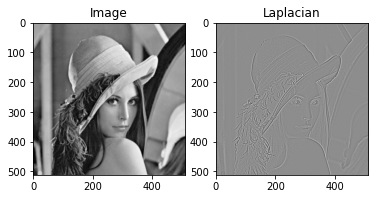

Time taken: 2.357797 s


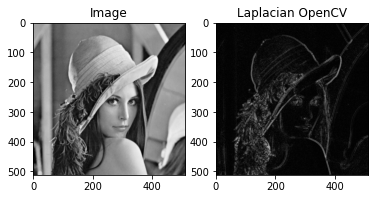

Time taken: 0.068232 s


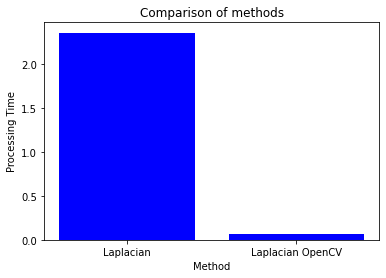

In [5]:
# Laplacian

# Read image
img = cv2.imread('lena.tif',0)
img = cv2.GaussianBlur(img, (3,3),0)
s=img.shape
print(s)

def laplacian(img):
    f=np.array([[0.0, 1.0, 0.0], [1.0, -4.0, 1.0], [0.0, 1.0, 0.0]])
    print("Laplacian filter:\n",f)

    result=np.zeros(s)
    for i in range(s[0] - 2):
        for j in range(s[1] - 2):
            result[i + 1, j + 1]= np.sum(np.multiply(f, img[i:i + 3, j:j + 3]))  
    
    return result

def laplacian_cv2(img):
    dst = cv2.Laplacian(img, cv2.CV_16S, ksize = 3)
    result_cv2 = cv2.convertScaleAbs(dst)
    return result_cv2

t0=time.time()
result=laplacian(img)
t1=time.time()
result_cv2=laplacian_cv2(img)
t2=time.time()
    
plt.figure()
plt.subplot(121)
plt.imshow(img,cmap="gray")
plt.title("Image")
plt.subplot(122)
plt.imshow(result,cmap="gray")
plt.title("Laplacian")
plt.show()
print("Time taken: {:.6f} s".format(t1-t0))

plt.figure()
plt.subplot(121)
plt.imshow(img,cmap="gray")
plt.title("Image")
plt.subplot(122)
plt.imshow(result_cv2,cmap="gray")
plt.title("Laplacian OpenCV")
plt.show()
print("Time taken: {:.6f} s".format(t2-t1))

# Comparison
x=["Laplacian","Laplacian OpenCV"]
t=[t1-t0,t2-t1]
plt.bar(x,t,color="blue")
plt.xlabel("Method")
plt.ylabel("Processing Time")
plt.title("Comparison of methods")
plt.show()

Q.2. Write python code from scratch for canny edge detection method for image (lena.tif) and demonstrate results of each step and also compare final result with OpenCV functions   compare results with OpenCV function

(512, 512)


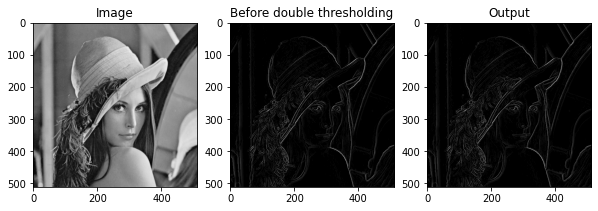

Time taken: 0.982805 s


In [15]:
# OpenCV
# Read image
img = cv2.imread('lena.tif',0)
s=img.shape
print(s)

def canny_cv2(img, weak_th = None, strong_th = None): 
       
    # Noise reduction step 
    img = cv2.GaussianBlur(img, (5, 5), 1.4) 
       
    # Calculating the gradients 
    gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3) 
    gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3) 
      
    # Conversion of Cartesian coordinates to polar  
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True) 
       
    # setting the minimum and maximum thresholds  for double thresholding 
    mag_max = np.max(mag) 
    if not weak_th:weak_th = mag_max * 0.1
    if not strong_th:strong_th = mag_max * 0.5
      
    # getting the dimensions of the input image   
    height, width = img.shape 
       
    # Looping through every pixel of the grayscale image 
    for i_x in range(width): 
        for i_y in range(height): 
               
            grad_ang = ang[i_y, i_x] 
            grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang) 
               
            # selecting the neighbours of the target pixel 
            # according to the gradient direction 
            # In the x axis direction 
            if grad_ang<= 22.5: 
                neighb_1_x, neighb_1_y = i_x-1, i_y 
                neighb_2_x, neighb_2_y = i_x + 1, i_y 
              
            # top right (diagnol-1) direction 
            elif grad_ang>22.5 and grad_ang<=(22.5 + 45): 
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
              
            # In y-axis direction 
            elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90): 
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
              
            # top left (diagnol-2) direction 
            elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135): 
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1
              
            # Now it restarts the cycle 
            elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180): 
                neighb_1_x, neighb_1_y = i_x-1, i_y 
                neighb_2_x, neighb_2_y = i_x + 1, i_y 
               
            # Non-maximum suppression step 
            if width>neighb_1_x>= 0 and height>neighb_1_y>= 0: 
                if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]: 
                    mag[i_y, i_x]= 0
                    continue
   
            if width>neighb_2_x>= 0 and height>neighb_2_y>= 0: 
                if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]: 
                    mag[i_y, i_x]= 0
   
    weak_ids = np.zeros_like(img) 
    strong_ids = np.zeros_like(img)               
    ids = np.zeros_like(img) 
    mag1=mag
    
    # double thresholding step 
    for i_x in range(width): 
        for i_y in range(height): 
              
            grad_mag = mag[i_y, i_x] 
              
            if grad_mag<weak_th: 
                mag[i_y, i_x]= 0
            elif strong_th>grad_mag>= weak_th: 
                ids[i_y, i_x]= 1
            else: 
                ids[i_y, i_x]= 2
                
    return mag, mag1

t2=time.time()
result_cv2, mag1=canny_cv2(img, 15, 21)   
t3=time.time()

plt.figure(figsize=(10,5)) 
plt.subplot(131)  
plt.imshow(img,cmap="gray")
plt.title("Image")
plt.subplot(132) 
plt.imshow(mag1,cmap="gray")
plt.title("Before double thresholding")
plt.subplot(133)
plt.imshow(result_cv2,cmap="gray") 
plt.title("Output")
plt.show()
print("Time taken: {:.6f} s".format(t3-t2))

In [29]:
def sobel(img):
    Gx = np.array([[-1.0, 0.0, 1.0], [-2.0, 0.0, 2.0], [-1.0, 0.0, 1.0]])
    Gy = np.array([[-1.0, -2.0, -1.0], [0.0, 0.0, 0.0], [1.0, 2.0, 1.0]])
    
    result=np.zeros(s)
    gx=np.zeros(s)
    gy=np.zeros(s)
    for i in range(s[0] - 2):
        for j in range(s[1] - 2):
            gx[i + 1, j + 1]= np.sum(np.multiply(Gx, img[i:i + 3, j:j + 3]))  
            gy[i + 1, j + 1]= np.sum(np.multiply(Gy, img[i:i + 3, j:j + 3])) 
            
    result = np.sqrt(gx ** 2 + gy ** 2)
    
    return result,gx,gy

def cart2polar(x,y):
    mag=np.sqrt(x**2+y**2)
    ang=np.arctan2(y,x)*(180.0/np.pi)
    return x,y

(512, 512)


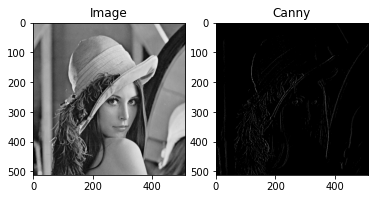

Time taken: 5.102382 s


In [35]:
# Read image
img = cv2.imread('lena.tif',0)
# img = cv2.GaussianBlur(img, (5, 5), 3) 
s=img.shape
print(s)

def canny(img, weak_th = None, strong_th = None): 

    # Calculating the gradients 
    _,gx,gy=sobel(img)
      
    # Conversion of Cartesian coordinates to polar  
    mag, ang = cart2polar(gx, gy) 
       
    # setting the minimum and maximum thresholds  for double thresholding 
    mag_max = np.max(mag) 
    if not weak_th:weak_th = mag_max * 0.1
    if not strong_th:strong_th = mag_max * 0.5
      
    # getting the dimensions of the input image   
    height, width = img.shape 
       
    # Looping through every pixel of the grayscale image 
    for i_x in range(width): 
        for i_y in range(height): 
               
            grad_ang = ang[i_y, i_x] 
            grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang) 
               
            # selecting the neighbours of the target pixel 
            # according to the gradient direction 
            # In the x axis direction 
            if grad_ang<= 22.5: 
                neighb_1_x, neighb_1_y = i_x-1, i_y 
                neighb_2_x, neighb_2_y = i_x + 1, i_y 
              
            # top right (diagnol-1) direction 
            elif grad_ang>22.5 and grad_ang<=(22.5 + 45): 
                neighb_1_x, neighb_1_y = i_x-1, i_y-1
                neighb_2_x, neighb_2_y = i_x + 1, i_y + 1
              
            # In y-axis direction 
            elif grad_ang>(22.5 + 45) and grad_ang<=(22.5 + 90): 
                neighb_1_x, neighb_1_y = i_x, i_y-1
                neighb_2_x, neighb_2_y = i_x, i_y + 1
              
            # top left (diagnol-2) direction 
            elif grad_ang>(22.5 + 90) and grad_ang<=(22.5 + 135): 
                neighb_1_x, neighb_1_y = i_x-1, i_y + 1
                neighb_2_x, neighb_2_y = i_x + 1, i_y-1
              
            # Now it restarts the cycle 
            elif grad_ang>(22.5 + 135) and grad_ang<=(22.5 + 180): 
                neighb_1_x, neighb_1_y = i_x-1, i_y 
                neighb_2_x, neighb_2_y = i_x + 1, i_y 
               
            # Non-maximum suppression step 
            if width>neighb_1_x>= 0 and height>neighb_1_y>= 0: 
                if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]: 
                    mag[i_y, i_x]= 0
                    continue
   
            if width>neighb_2_x>= 0 and height>neighb_2_y>= 0: 
                if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]: 
                    mag[i_y, i_x]= 0
   
    weak_ids = np.zeros_like(img) 
    strong_ids = np.zeros_like(img)               
    ids = np.zeros_like(img) 
       
    # double thresholding step 
    for i_x in range(width): 
        for i_y in range(height): 
              
            grad_mag = mag[i_y, i_x] 
              
            if grad_mag<weak_th: 
                mag[i_y, i_x]= 0
            elif strong_th>grad_mag>= weak_th: 
                ids[i_y, i_x]= 1
            else: 
                ids[i_y, i_x]= 2
       
       
    # finally returning the magnitude of gradients of edges 
    return mag 

t0=time.time()
canny_img = canny(img) 
t1=time.time()

# Displaying the input and output image   
plt.figure() 
plt.subplot(121)  
plt.imshow(img,cmap="gray")
plt.title("Image")
plt.subplot(122)
plt.imshow(canny_img,"gray")
plt.title("Canny")
plt.show()
print("Time taken: {:.6f} s".format(t1-t0))

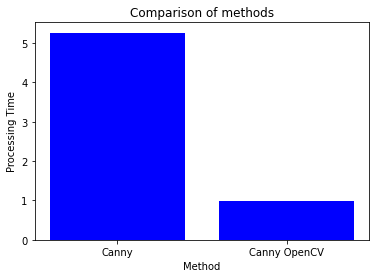

In [34]:
# Comparison
x=["Canny","Canny OpenCV"]
t=[t1-t0,t3-t2]
plt.bar(x,t,color="blue")
plt.xlabel("Method")
plt.ylabel("Processing Time")
plt.title("Comparison of methods")
plt.show()

In [2]:
import numpy as np
import scipy
from scipy import signal,ndimage
import matplotlib.pyplot as plt
import cv2
#import time
from skimage import feature, measure
import pandas as pd

## Question 3

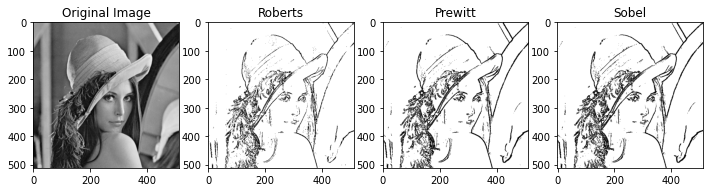

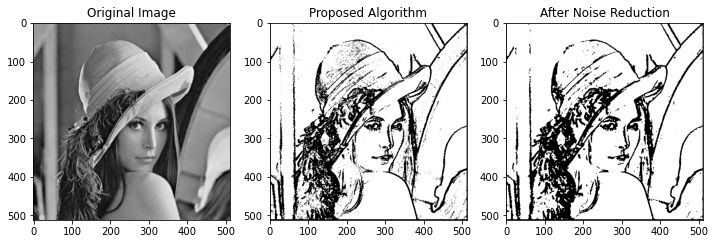

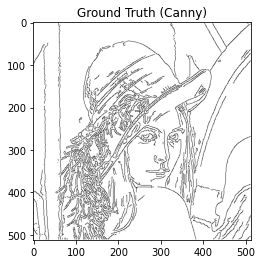

In [9]:
def padding(img,pad):
    padded_img = np.zeros((img.shape[0]+2*pad,img.shape[1]+2*pad),dtype=np.uint8)
    padded_img[pad:-pad,pad:-pad] = img
    return padded_img


def find_edges(img):
    img_2 = padding(img,2)
    
    for i in range(2,img.shape[0]+2):
        for j in range(2,img.shape[1]+2):
            mask = img_2[i-2:i+3,j-2:j+3].astype(np.float)
            avg = (np.sum(mask) - mask[2,2])/24
            p = np.count_nonzero(abs(mask - mask[2,2]) <= 15) - 1
            if (abs(img_2[i,j] - avg)<=120) and (p>=9):
                img_2[i,j] = 255
            else:
                img_2[i,j] = 0
                
    img_2 = img_2[2:-2,2:-2]
    return img_2

def noise_detection(img):
    img_filter = img.copy().astype(np.float32)
    for i in range(1,img_filter.shape[0]-1):
        for j in range(1,img_filter.shape[1]-1):
            if img_filter[i,j] == 0:
                if (img_filter[i-1,j]+img_filter[i+1,j]+
                    img_filter[i,j-1]+img_filter[i,j+1]) >= (3*255):
                    img_filter[i,j] = 255
                    
            elif img_filter[i,j] == 255:
                if (img_filter[i-1,j]+img_filter[i+1,j]+
                    img_filter[i,j-1]+img_filter[i,j+1]) <= 255:
                    img_filter[i,j] = 0
    
    img_filter = img_filter.astype(np.uint8)
    return img_filter

img=cv2.imread('lena.tif', cv2.IMREAD_GRAYSCALE)
#img = cv2.GaussianBlur(img, (3, 3), 0)


# Roberts
k_x = np.array([[-1, 0], [0, 1]], dtype = int)
k_y = np.array([[0, -1], [1, 0]], dtype = int)
x = cv2.filter2D(img, cv2.CV_16S, k_x)
y = cv2.filter2D(img, cv2.CV_16S, k_y)
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Roberts = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

# Prewitt
#k_x = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]], dtype=int)
#k_y = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]], dtype=int)
k_x = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]], dtype=int)
k_y = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]], dtype=int)
x = cv2.filter2D(img, cv2.CV_16S, k_x)
y = cv2.filter2D(img, cv2.CV_16S, k_y)
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Prewitt = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

# Sobel
x = cv2.Sobel(img, cv2.CV_16S, 1, 0)
y = cv2.Sobel(img, cv2.CV_16S, 0, 1)
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)
Sobel = cv2.addWeighted(absX, 0.5, absY, 0.5, 0)

#Convert to Black and White
Roberts = cv2.threshold(Roberts,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
Prewitt = cv2.threshold(Prewitt,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]
Sobel = cv2.threshold(Sobel,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)[1]


#Paper-1 Method
img_edges = find_edges(img)
img_noise_detect = noise_detection(img_edges)


f, plots = plt.subplots(1, 4, figsize=(12, 12))  
plots[0].imshow(img,'gray') 
plots[0].set_title("Original Image")
plots[1].imshow(Roberts,'gray')
plots[1].set_title("Roberts")
plots[2].imshow(Prewitt,'gray')
plots[2].set_title("Prewitt")
plots[3].imshow(Sobel,'gray')
plots[3].set_title("Sobel")
plt.show()


#fig = plt.figure() 
f, plots = plt.subplots(1, 3, figsize=(12, 12))  
plots[0].imshow(img,'gray') 
plots[0].set_title("Original Image")
plots[1].imshow(img_edges,'gray')
plots[1].set_title("Proposed Algorithm")
plots[2].imshow(img_noise_detect,'gray')
plots[2].set_title("After Noise Reduction")
plt.show()


#Edges obtained from Canny are used as Ground truth images
canny_edges = feature.canny(img)
canny_edges = np.where(canny_edges == True,0,255).astype(np.uint8)

plt.imshow(canny_edges,'gray')
plt.title("Ground Truth (Canny)")
plt.show()

In [8]:
def imp(img,img_gt,alpha=1/9):
    dist =  1 / (1+ (np.square(ndimage.distance_transform_edt(img_gt)) * alpha))
    fom = np.sum(np.where(img==0,dist,0))
    fom /= np.maximum( np.count_nonzero(img==0), np.count_nonzero(img_gt==0))
    return fom


images = [img_noise_detect,Sobel,Roberts,Prewitt]
col_array = ['Proposed','Sobel','Roberts','Prewitt']
df_metrics = pd.DataFrame(index=['IMP', 'FP', 'FN', 'TP', 'Pnd', 'Pco', 'Pfa', 'd4f2','N'],
                          columns=col_array)


for i in range(len(images)):
    df_metrics.at['IMP',col_array[i]] = imp(images[i],canny_edges,1/9)
    df_metrics.at['TP',col_array[i]] = np.count_nonzero(np.logical_and(canny_edges==0,images[i]==0))
    df_metrics.at['FP',col_array[i]] = np.count_nonzero(np.logical_and(canny_edges!=0,images[i]==0))
    df_metrics.at['FN',col_array[i]] = np.count_nonzero(np.logical_and(canny_edges==0,images[i]!=0))
    df_metrics.at['N',col_array[i]] = np.maximum( np.count_nonzero(images[i]==0), np.count_nonzero(canny_edges==0))
    
df_metrics.loc['Pco'] = df_metrics.loc['TP']/df_metrics.loc['N']
df_metrics.loc['Pnd'] = df_metrics.loc['FN']/df_metrics.loc['N']
df_metrics.loc['Pfa'] = df_metrics.loc['FP']/df_metrics.loc['N']
df_metrics.loc['d4f2'] = np.sqrt((np.square(df_metrics.loc['Pco']-1)+
                                 np.square(df_metrics.loc['IMP']-1)+
                                 np.square(df_metrics.loc['Pnd'])+
                                 np.square(df_metrics.loc['Pfa'])).astype(np.float))
    

df_metrics = df_metrics.drop(index='N')
display(df_metrics)

,Proposed,Sobel,Roberts,Prewitt
IMP,0.860001,0.369283,0.342471,0.358336
FP,6916,16766,18370,16972
FN,37496,3023,4187,2976
TP,15369,5519,3915,5313
Pnd,0.709278,0.135652,0.187884,0.133543
Pco,0.290722,0.247655,0.175679,0.238411
Pfa,0.130824,0.752345,0.824321,0.761589
d4f2,1.021208,1.244287,1.351538,1.260794


## Question 4

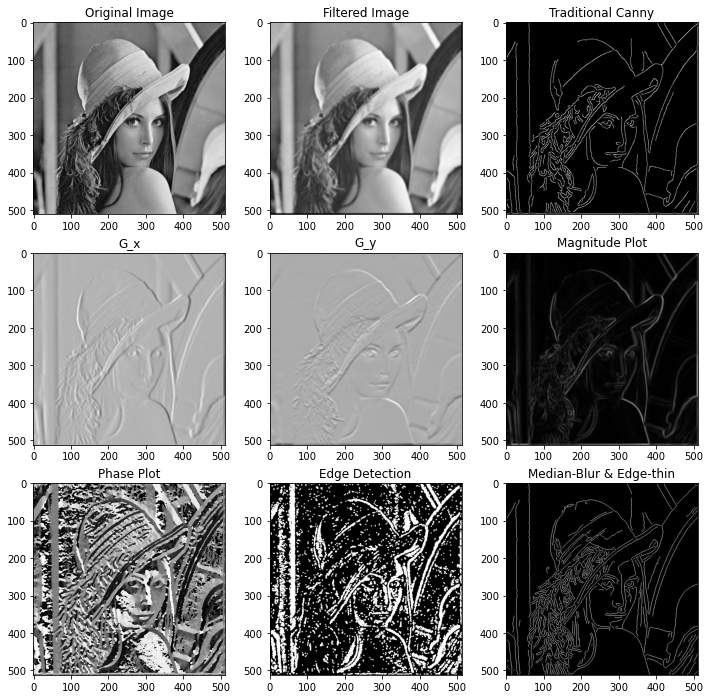

In [30]:
def padding(img,pad):
    padded_img = np.zeros((img.shape[0]+2*pad,img.shape[1]+2*pad),dtype=img.dtype)
    padded_img[pad:-pad,pad:-pad] = img
    return padded_img



def improved_filter(img,n=5,h=2):
    kernelx = np.array([[0,0,0],[-0.5,0,0.5],[0,0,0]])
    kernely = np.array([[0,-0.5,0],[0,0,0],[0,0.5,0]])
    for k in range(n):
        # Horigental Changes(Gx)"
        g_x = cv2.filter2D(img, -1, kernelx)
        # Vertical Changes(Gy)
        g_y = cv2.filter2D(img, -1, kernely)
        
        d_xy = np.hypot(g_x,g_y)
        w_xy = np.exp(-np.sqrt(d_xy)/(2*h*h))
                
        f_w = padding(img * w_xy,1)
        w_xy = padding(w_xy,1)
        
        temp_img = np.zeros(f_w.shape)
        for i in range(1,img.shape[0]):
            for j in range(1,img.shape[1]):
                temp_img[i,j] = np.sum(f_w[i-1:i+2,j-1:j+2])/np.sum(w_xy[i-1:i+2,j-1:j+2])
    
        img = temp_img[1:-1,1:-1].astype(np.uint8)
        #plt.imshow(img,"gray")
        #plt.show()
    return img

def med_blur_thinning(img):
    kernel = np.ones((3,3),np.uint8)
    img = cv2.medianBlur(img, 3)
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    #import edge_thinning from ../utils/edge.py
    opening = edge_thinning(opening)
    return opening
    

def detect_edges(filtered_img,T=1.5):
    # Calculating the gradients 
    gx = cv2.Sobel(filtered_img, cv2.CV_64F, 1, 0, 3) 
    gy = cv2.Sobel(filtered_img, cv2.CV_64F, 0, 1, 3) 
    
    mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True)
    
    edge_algo = np.zeros(mag.shape,dtype=np.uint8)
    
    for i in range(1,mag.shape[0] - 1):
        for j in range(1,mag.shape[1] - 1):
            if (mag[i,j] != 0) and (edge_algo[i,j] < 255):
                ang_temp = ang[i-1:i+2,j-1:j+2]
                Ang_t = np.abs(ang_temp - np.mean(ang_temp))
                if Ang_t[1,1] < T:
                    x,y = np.where(Ang_t<T)
                    edge_algo[i-1+x,j-1+y] = 255
                elif np.any(np.logical_and((Ang_t < T),(edge_algo[i-1:i+2,j-1:j+2] < 255))):
                    x,y = np.where(Ang_t<T)
                    edge_algo[i-1+x,j-1+y] = 255
                    #edge_algo[i,j] = 255
    
    return gx,gy,mag,ang,edge_algo
                

grayImage = cv2.imread('lena.tif', cv2.IMREAD_GRAYSCALE)
filtered_img = improved_filter(grayImage.copy(),n=5,h=2)
gx,gy,mag,ang,edge_detect = detect_edges(filtered_img,T=0.5)
edge_thin = med_blur_thinning(edge_detect)
trad_canny = feature.canny(filtered_img,sigma=1.2)


f, plots = plt.subplots(3, 3, figsize=(12, 12))  
plots[0,0].imshow(grayImage,'gray') 
plots[0,0].set_title("Original Image")
plots[0,1].imshow(filtered_img,'gray')
plots[0,1].set_title("Filtered Image")
plots[0,2].imshow(trad_canny,'gray')
plots[0,2].set_title("Traditional Canny")
plots[1,0].imshow(gx,'gray')
plots[1,0].set_title("G_x")
plots[1,1].imshow(gy,'gray')
plots[1,1].set_title("G_y")
plots[1,2].imshow(mag,'gray')
plots[1,2].set_title("Magnitude Plot")
plots[2,0].imshow(ang,'gray')
plots[2,0].set_title("Phase Plot")
plots[2,1].imshow(edge_detect,'gray')
plots[2,1].set_title("Edge Detection")
plots[2,2].imshow(edge_thin,'gray')
plots[2,2].set_title("Median-Blur & Edge-thin")
plt.show()


In [31]:
#Evaluation Metrics

#skimage.measure.label can be used to find 4 connectivity and 8 connectivity
#connectivity=1 ==>> 4-connectivity
#connectivity=2 ==>> 8-connectivity
df_metrics = pd.DataFrame(index=["Traditional Algorithm","Improved Algorithm"],
                          columns=['A','B','B/A'])
df_metrics.at["Traditional Algorithm",'A'] = np.count_nonzero(
    np.unique(measure.label(trad_canny, connectivity=1),
              return_counts=True)[1] > 1)
df_metrics.at["Improved Algorithm",'A'] = np.count_nonzero(
    np.unique(measure.label(edge_thin, connectivity=1),
              return_counts=True)[1] > 1)
df_metrics.at["Traditional Algorithm","B"] = np.count_nonzero(
    np.unique(measure.label(trad_canny, connectivity=2),
              return_counts=True)[1] > 1)
df_metrics.at["Improved Algorithm","B"] = np.count_nonzero(
    np.unique(measure.label(edge_thin, connectivity=2),
              return_counts=True)[1] > 1)

df_metrics["B/A"] = df_metrics["B"] / df_metrics["A"]


display(df_metrics)

,A,B,B/A
Traditional Algorithm,8892,1106,0.124381
Improved Algorithm,9683,1164,0.120211


Q5. Write python code from scratch for Modified Otsu method for medical image segmentation explained by author in  research paper 3 (5329.jpg) and demonstrate results of each step. Also compute Precision, Recall, F1 score and   Jaccard Index without and with sklearn library.

In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt
import cv2
import sklearn.metrics as metrics

In [2]:
# Reading Radiology image
img = cv2.imread('/kaggle/input/otsu-xray/5329.jpg',0)
img_gt = cv2.imread('/kaggle/input/otsu-xray/5329-GT.jpg',0)
print(img.shape)

(168, 115)


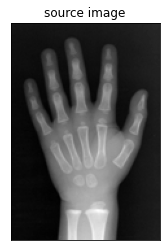

In [3]:
#Displaying grayscale image
plt.imshow(img, "gray")
plt.title("source image"), plt.xticks([]), plt.yticks([])
plt.show()

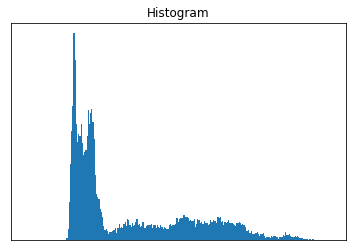

In [4]:
#Plotting the histogram
hist = plt.hist(img.ravel(),256,[0,256])
plt.title("Histogram"), plt.xticks([]), plt.yticks([])
plt.show()

In [5]:
# Total pixels in the image
total = np.sum(hist[0])

# calculate the initial weights and the means
left, right = np.hsplit(hist[0],[0])
left_bins, right_bins = np.hsplit(hist[1],[0])
# left weights
w_0 = 0.0
# Right weights
w_1 = np.sum(right)/total
# Left mean
mean_0 = 0.0
weighted_sum_0 = 0.0
# Right mean
weighted_sum_1 = np.dot(right,right_bins[:-1])
mean_1 = weighted_sum_1/np.sum(right)

In [6]:
def recursive_otsu1(hist, w_0=w_0, w_1=w_1, weighted_sum_0=weighted_sum_0, weighted_sum_1=weighted_sum_1, thres=1, fn_max=-np.inf, thresh=0, total=total):
    if thres<=255:
        # To pass the division by zero warning
        if np.sum(hist[0][:thres+1]) !=0 and np.sum(hist[0][thres+1:]) !=0:
            # Update the weights
            w_0 += hist[0][thres]/total
            w_1 -= hist[0][thres]/total
            # Update the mean
            weighted_sum_0 += (hist[0][thres]*hist[1][thres])
            mean_0 = weighted_sum_0/np.sum(hist[0][:thres+1])
            weighted_sum_1 -= (hist[0][thres]*hist[1][thres])
            if thres == 255:
                mean_1 = 0.0
            else:
                mean_1 = weighted_sum_1/np.sum(hist[0][thres+1:])
            
            #####################################################################
            sumsq_0=0          #sum of squares in order to calculate in-class variance of class 0
            sumsq_1=0          #sum of squares in order to calculate in-class variance of class 1
            for i in range(0,thres+1):
                sumsq_0+=hist[0][i]*((i-mean_0)**2)
            var_0=sumsq_0/np.sum(hist[0][:thres+1])     #Divide sum of squares by histogram count to get variance
            for i in range(thres+1,256):
                sumsq_1+=hist[0][i]*((i-mean_1)**2)
            var_1=sumsq_1/np.sum(hist[0][thres+1:])
            #####################################################################
            
            # Calculate the between-class variance
            #lambda 1 and lambda 2 are Rayleigh parameters, calculated as given in research paper 3.
            l0=((mean_0**2+var_0)/2)**(0.5)       #lambda1
            l1=((mean_1**2+var_1)/2)**(0.5)       #lambda2
            out = w_0*w_1*((l1-l0)**2)
            # if variance maximum, update it
            if out>fn_max:
                fn_max = out
                thresh = thres
        return recursive_otsu1(hist, w_0=w_0, w_1=w_1, weighted_sum_0=weighted_sum_0, 
            weighted_sum_1=weighted_sum_1, thres=thres+1, fn_max=fn_max, thresh=thresh, total=total)
    # Stopping condition
    else:
        return fn_max,thresh

In [7]:
# Check the results
var_value, thresh_value = recursive_otsu1(hist, w_0=w_0, w_1=w_1, weighted_sum_0=weighted_sum_0, 
            weighted_sum_1=weighted_sum_1, thres=1, fn_max=-np.inf, thresh=0, total=total)
print("Maximum variance value = %f" % var_value)
print("Modified Otsu threshold=", thresh_value)

## thresholded image using Fast Approach of otsu
otsu_fast_img = img.copy()
otsu_fast_img[img >=thresh_value] = 255
otsu_fast_img[ img <thresh_value] = 0

# find otsu's threshold value with OpenCV function
ret, otsu = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("OpenCV Otsu threshold=", ret)


Maximum variance value = 1144.363981
Modified Otsu threshold= 88
OpenCV Otsu threshold= 104.0


Text(0.5, 1.0, 'Ground truth')

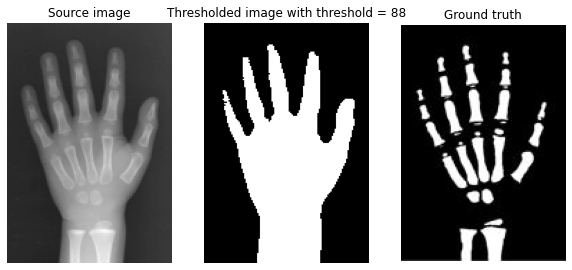

In [8]:
fig = plt.figure(figsize=(10, 10))
rows = 1
columns = 3

fig.add_subplot(rows, columns, 1)
plt.imshow(img,cmap = 'gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title("Source image")

fig.add_subplot(rows, columns, 2)
plt.imshow(otsu_fast_img,cmap = 'gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title("Thresholded image with threshold = %d" % thresh_value)

fig.add_subplot(rows, columns, 3)
plt.imshow(img_gt,cmap = 'gray', vmin = 0, vmax = 255)
plt.axis('off')
plt.title("Ground truth")

In [9]:
img_gt.shape

(171, 119)

In [10]:
#Cropping the ground truth image to match the shape of the input and output
img_gt_cropped = img_gt[:img.shape[0],:img.shape[1]]
img_gt_cropped.shape

(168, 115)

In [11]:
np.unique(img_gt)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [12]:
#The ground truth image is raw and uthresholded, because it has more than 2 unique values.
#Thresholding the raw ground truth image:
otsu_fast_img_gt = img_gt_cropped.copy()
otsu_fast_img_gt[img_gt_cropped >=thresh_value] = 255
otsu_fast_img_gt[ img_gt_cropped <thresh_value] = 0

In [13]:
#Result classes of pixels
tp=0 #True positive
fp=0 #False positive
tn=0 #True negative
fn=0 #FFalse negative

In [14]:
#Count the number of pixels in each class.
#Foreground is considered positive and background as negative.
for i in range(0,img.shape[0]):
    for j in range(0,img.shape[1]):
        if(otsu_fast_img_gt[i][j]==255 and otsu_fast_img[i][j]==255):
            tp+=1
        elif(otsu_fast_img_gt[i][j]==255 and otsu_fast_img[i][j]==0):
            fn+=1
        elif(otsu_fast_img_gt[i][j]==0 and otsu_fast_img[i][j]==255):
            fp+=1
        else:
            tn+=1

In [15]:
#Compute evaluation scores based on the above counts.
precision = tp/(tp+fp)
recall    = tp/(tp+fn)
f1        = 2*precision*recall/(precision+recall)
jaccard   = tp/(tp+fp+fn)
print(precision, recall, f1, jaccard)

0.3947191162602721 0.9925474254742548 0.5648192771084337 0.39355271994627267


In [16]:
#Compute evaluation scores using sklearn library.
precision_sk = metrics.precision_score(otsu_fast_img_gt.flatten(),otsu_fast_img.flatten(),pos_label=255)
recall_sk    = metrics.recall_score(otsu_fast_img_gt.flatten(),otsu_fast_img.flatten(),pos_label=255)
f1_sk        = metrics.f1_score(otsu_fast_img_gt.flatten(),otsu_fast_img.flatten(),pos_label=255)
jaccard_sk   = metrics.jaccard_score(otsu_fast_img_gt.flatten(),otsu_fast_img.flatten(),pos_label=255)
print(precision_sk, recall_sk, f1_sk, jaccard_sk)
#The metric values are found to be the same.

0.3947191162602721 0.9925474254742548 0.5648192771084337 0.39355271994627267


Q6. Write python code from scratch for multilevel thresholding for image segmentation explained by author in research paper 4 and demonstrate results of each step.

Import Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

Read the image and make a flattened and sorted copy

In [2]:
image = cv2.imread('/kaggle/input/lena-image/lenna.tif',0)
img_flat=image.flatten()
img_flat.sort()

Make an array of images to store output

In [3]:
out=np.array([image,image,image,image])

Number of thresholds, {2,4,6,8}

In [4]:
n_th = np.array([2,4,6,8])

Algorithm

In [5]:
#Loop through different values of n_th
for n in n_th:
    #Initialize major interval bounds
    a=0
    b=255
    #Loop to perform the operation n/2 - 1 times, and then once with different conditions
    for counter in range(0,(int)(n/2)):
        
        #Find array indices corresponding to interval bounds
        a_ind = np.searchsorted(img_flat,a,'left')
        b_ind = np.searchsorted(img_flat,b,'right')
        
        #Find mean and standard deviation of pixel values within the range
        mean=(int)(np.mean(img_flat[a_ind:b_ind]))
        std=(int)(np.std(img_flat[a_ind:b_ind]))
        
        #Calculate sub-range boundaries
        if(counter == (int)(n/2)-1): #The last iteration
            T1=mean
            T2=mean+1
        else:                        #Iterations in between
            T1=mean-std
            T2=mean+std
            
        #Find array indices corresponding to sub-range bounds
        T1_ind = np.searchsorted(img_flat,T1,'right')
        T2_ind = np.searchsorted(img_flat,T2,'left')
    
        #Find the pixel values to be assigned after segmentation
        #through weighted average of pixels within sub-range
        avg1=(int)(np.mean(img_flat[a_ind:T1_ind]))
        avg2=(int)(np.mean(img_flat[T2_ind:b_ind]))
    
        #Assign pixel values according to sub-range and threshold
        for i in range(0,image.shape[0]):
            for j in range(0,image.shape[1]):
                if(image[i][j]>=a and image[i][j]<=T1):
                    out[(int)(n/2)-1][i][j]=avg1
                elif(image[i][j]>=T2 and image[i][j]<=b):
                    out[(int)(n/2)-1][i][j]=avg2
    
        #Update the major interval bounds for the next iteration
        a=T1+1
        b=T2-1

Original Image

(-0.5, 511.5, 511.5, -0.5)

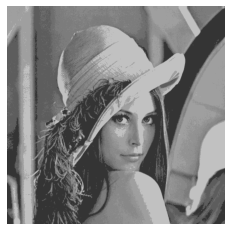

In [6]:
plt.imshow(out[3],cmap='gray',vmin=0,vmax=255)
plt.axis('off')

Output images at number of thresholds n = {2,4,6,8}

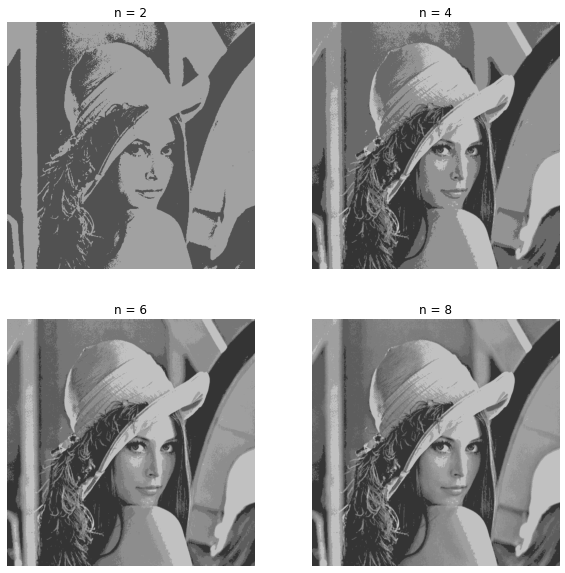

In [7]:
fig = plt.figure(figsize=(10, 10))
rows = 2
columns = 2 
for i in range(0,4):
    fig.add_subplot(rows, columns, i+1)
    plt.imshow(out[i],cmap = 'gray', vmin = 0, vmax = 255)
    plt.axis('off')
    plt.title("n = %d" % (2*i+2))